**Google Colab -> Cette cellule est à executer (1 fois) pour le cloner le dépot en local**

In [ ]:
!git clone https://github.com/ManDes71/Rakuten_Text_Classification_ML.git

Cloning into 'Rakuten_Text_Classification_ML'...
remote: Enumerating objects: 266, done.
remote: Counting objects: 100% (58/58), done.
remote: Compressing objects: 100% (54/54), done.
remote: Total 266 (delta 31), reused 9 (delta 4), pack-reused 208
Receiving objects: 100% (266/266), 49.52 MiB | 12.44 MiB/s, done.
Resolving deltas: 100% (122/122), done.
Updating files: 100% (52/52), done.
Filtering content: 100% (5/5), 1.41 GiB | 33.13 MiB/s, done.


**Google Colab -> Cette cellule est à executer (1 fois) pour installer les bibliothèques nécessaires**

In [1]:
import sys
sys.path.append('/content/Rakuten_Text_Classification_ML')
#import numpy as np
#print(np.__version__)
#!pip install --upgrade numpy
#print(np.__version__)
!pip install -r /content/Rakuten_Text_Classification_ML/requirements.txt

In [2]:
import numpy as np
print(np.__version__)
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
from sklearn.feature_extraction.text import CountVectorizer
pd.set_option('display.max_colwidth', 100)

1.26.3


In [3]:
# lecture des données sources d'entrainement
df_feats=pd.read_csv('/content/Rakuten_Text_Classification_ML/X_train_update.csv')

# lecture des données cibles d'entrainement
df_target=pd.read_csv('/content/Rakuten_Text_Classification_ML/Y_train_CVw08PX.csv')

# création d'un dataframe globale -  jointure
df=df_feats.merge(df_target,on='Unnamed: 0',how='inner')
df.rename(columns={'Unnamed: 0': 'Id'}, inplace=True)


nomenclature=pd.read_csv('/content/Rakuten_Text_Classification_ML/NOMENCLATURE.csv',header=0,encoding='utf-8',sep=';',index_col=0)
catdict=nomenclature.to_dict()['definition']
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           84916 non-null  int64 
 1   designation  84916 non-null  object
 2   description  55116 non-null  object
 3   productid    84916 non-null  int64 
 4   imageid      84916 non-null  int64 
 5   prdtypecode  84916 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 4.5+ MB
None


#### Il faut rejeter certaines lignes.
#### On ecarte les descriptions de comportant que des chiffres
#### ou contenant  soit "https://" , soit  "http://" car incompatible avec le mudule detectlang

In [7]:
df_descrip=df.dropna(subset=['description'])
list_rejet=[]
df_descrip.info()
r2=re.compile("https?://")
r=re.compile("[a-zA-Z]")
for i in df_descrip.index :
    pointeur=r.findall(df_descrip.loc[i,'description']) # il y a des lettres alphabétiques dans la description
    pointeur2=r2.findall(df_descrip.loc[i,'description']) # contient "https://" ou "http://"
    if pointeur == []:
        print(str(df_descrip.loc[i,'description'])+'\n')
        list_rejet.append(df_descrip.loc[i,'Id'])  # il n'y a pas de lettres alphabétiques
    else:
        if len(pointeur2) > 0 :
            if len(df_descrip.loc[i,'description']) <120:
                print(str(df_descrip.loc[i,'description'])+'\n')
                list_rejet.append(df_descrip.loc[i,'Id'])  # contient "https://" ou "http://"



#### descriptions : on  passe les description sans lettres et contenant "https://" ou "http://" en NAN

for i in list_rejet:
    df.loc[i,'description']=np.NaN
print(df.info())
print(len(list_rejet))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 55116 entries, 2 to 84914
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           55116 non-null  int64 
 1   designation  55116 non-null  object
 2   description  55116 non-null  object
 3   productid    55116 non-null  int64 
 4   imageid      55116 non-null  int64 
 5   prdtypecode  55116 non-null  int64 
dtypes: int64(4), object(2)
memory usage: 2.9+ MB
1989

...

...

-

0

1985

...

2259.00

1984

https://placehold.it/100x70

https://www.pro-bems.com/IMAGES/images_1/FIGJJCT0000117/m/FIGJJCT0000117_5.jpg

-

...

...

19.236-7

.

...

(1

-

0

-

1999 1/220

...

1985

-

-

1972.

(1

0

...

1980

-

https://www.pro-bems.com/IMAGES/images_1/FIG83X17001/m/FIG83X17001_5.jpg

(1

-

-

...

0

-

1985

-

...

https://www.pro-bems.com/IMAGES/images/BOOKPNLIGMAG19/m/BOOKPNLIGMAG19_5.jpg

1969

.

0

-

...

0

3323

-

1988

1947

1986

...

-

1991

-

ht

#### la colonne description passe de 55116 à 55049 lignes

In [8]:
df2=df.copy()

##  -----------------------------------------------------
##                         GENERERATION DF_LANGUE.CSV
##  -----------------------------------------------------

## Cette partie sert à générer le fichier DF_LANGUE.CSV .
## Cette partie peut être longue,
## si le fichier existe,il est possible de se rendre directement au paragraphe
# =>  EXPLORATION
### **************************************************************

### Recherche de la langue sur df_feats['designation']
#### La fonction detect_langs renvoie une liste d'objets, chacun représentant une langue possible
#### avec une probabilité associée.
#### Ces probabilités sont normalisées de manière à ce que leur somme soit égale à 1.

### Recherche de la langue sur df_feats['designation']¶

In [ ]:
from langdetect import detect_langs

print(df['designation'].head())
result=detect_langs(str(df['designation'].head()))
print("Langue possible sur l'ensemble des 5 premières lignes")
print(len(result),result)


0               Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design
1    Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...
2                           Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style
3                                        Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt)
4                                                                                   La Guerre Des Tuques
Name: designation, dtype: object
Langue possible sur l'ensemble des 5 premières lignes
3 [de:0.4285713604020295, en:0.4285702898126186, fr:0.14285830990997558]


##### création de 3 colonnes :
##### df['langue']   objet langue  majoritaire renvoyée par le module detect_langs
##### df['pays_design']  langue la plus probable pour le champ 'designation'
##### df['Ratio_design']   probabilite de la langue majoritaire renvoyée par le module detect_langs

In [ ]:

df['langue']=df['designation'].apply( lambda x : str(detect_langs(str(x))[0])[0:7] )
df['pays_design']=df['langue'].apply( lambda x : str(x)[0:2] )
df['Ratio_design']=df['langue'].apply( lambda x : str(x)[3:] ).astype(float)
df.head()

,Id,designation,description,productid,imageid,prdtypecode,langue,pays_design,Ratio_design
0,0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046,10,de:0.99,de,0.99
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...,NaN,436067568,1008141237,2280,fr:0.99,fr,0.99
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<...,201115110,938777978,50,nl:0.28,nl,0.28
3,3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496,1280,de:0.57,de,0.57
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'a...,278535884,1077757786,2705,ca:0.97,ca,0.97


#### Recherche de la langue sur df_feats['description']

In [ ]:
df_descrip=df.dropna(subset=['description'])
print(df_descrip['description'].head())
result=detect_langs(str(df_descrip['description'].head()))
print(len(result),result)


2     PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<...
4     Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'a...
7     CONQUERANT CLASSIQUE Cahier 240 x 320 mm seyès incolorecouverture en Polypro 96 pages agrafé pap...
9     Tente pliante V3S5 Pro PVC 500 gr/m² - 3 x 4m50.Que vous soyez un particulier pour votre jardin ...
10    The timeless DSW seat can now be paired with more types of legs! These wood legs look like a nat...
Name: description, dtype: object
2 [fr:0.7142827221905806, en:0.2857137533401482]


#### création de 2 colonnes :
#### df['langue_descr'] objet langue  majoritaire renvoyé par le module detect_langs
#### df['descrip_long'] taille du champ 'description'

In [ ]:
df_descrip['langue_descr']=df_descrip['description'].apply( lambda x : str(detect_langs(str(x))[0])[0:7] )
df_descrip['descrip_long'] = df_descrip['description'].apply(lambda x : len(x))
df3=df_descrip[['Id','langue_descr','descrip_long']]
df=pd.merge(df,df3,on='Id',how='outer')
print(df.info())
df.head()

<ipython-input-30-9d5ff210bf53>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descrip['langue_descr']=df_descrip['description'].apply( lambda x : str(detect_langs(str(x))[0])[0:7] )
<ipython-input-30-9d5ff210bf53>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_descrip['descrip_long'] = df_descrip['description'].apply(lambda x : len(x))


<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            84916 non-null  int64  
 1   designation   84916 non-null  object 
 2   description   55049 non-null  object 
 3   productid     84916 non-null  int64  
 4   imageid       84916 non-null  int64  
 5   prdtypecode   84916 non-null  int64  
 6   langue        84916 non-null  object 
 7   pays_design   84916 non-null  object 
 8   Ratio_design  84916 non-null  float64
 9   langue_descr  55049 non-null  object 
 10  descrip_long  55049 non-null  float64
dtypes: float64(2), int64(4), object(5)
memory usage: 7.8+ MB
None


,Id,designation,description,productid,imageid,prdtypecode,langue,pays_design,Ratio_design,langue_descr,descrip_long
0,0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046,10,de:0.99,de,0.99,NaN,NaN
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...,NaN,436067568,1008141237,2280,fr:0.99,fr,0.99,NaN,NaN
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<...,201115110,938777978,50,nl:0.28,nl,0.28,fr:0.99,760.0
3,3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496,1280,de:0.57,de,0.57,NaN,NaN
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'a...,278535884,1077757786,2705,ca:0.97,ca,0.97,fr:0.99,213.0


##### création de 2 colonnes :
##### df['pays_descr']  langue la plus probable pour le champ 'description'
##### df['Ratio_descr']   probabilite de la langue majoritaire renvoyé par le module detect_langs

In [ ]:
df['pays_descr']=df[~df['langue_descr'].isna() ]['langue_descr'].apply( lambda x : str(x)[0:2] )
df['Ratio_descr']=df[~df['langue_descr'].isna() ]['langue_descr'].apply( lambda x : str(x)[3:] ).astype('float')

print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Id            84916 non-null  int64  
 1   designation   84916 non-null  object 
 2   description   55049 non-null  object 
 3   productid     84916 non-null  int64  
 4   imageid       84916 non-null  int64  
 5   prdtypecode   84916 non-null  int64  
 6   langue        84916 non-null  object 
 7   pays_design   84916 non-null  object 
 8   Ratio_design  84916 non-null  float64
 9   langue_descr  55049 non-null  object 
 10  descrip_long  55049 non-null  float64
 11  pays_descr    55049 non-null  object 
 12  Ratio_descr   55049 non-null  float64
dtypes: float64(3), int64(4), object(6)
memory usage: 9.1+ MB
None


,Id,designation,description,productid,imageid,prdtypecode,langue,pays_design,Ratio_design,langue_descr,descrip_long,pays_descr,Ratio_descr
0,0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046,10,de:0.99,de,0.99,NaN,NaN,NaN,NaN
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...,NaN,436067568,1008141237,2280,fr:0.99,fr,0.99,NaN,NaN,NaN,NaN
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<...,201115110,938777978,50,nl:0.28,nl,0.28,fr:0.99,760.0,fr,0.99
3,3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496,1280,de:0.57,de,0.57,NaN,NaN,NaN,NaN
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'a...,278535884,1077757786,2705,ca:0.97,ca,0.97,fr:0.99,213.0,fr,0.99


### algorythme de la determination de la langue

In [ ]:
def determination_langue(dtframe):
    if dtframe['Ratio_design']>0.98 :
        ReponseLang = dtframe['pays_design']
    else:
        if dtframe['Ratio_descr']>0.98 :
            ReponseLang = dtframe['pays_descr']
        else:
            ReponseLang = dtframe['pays_design']
    return ReponseLang;
def determination_ratio(dtframe):
    if dtframe['Ratio_design']>0.98 :
        ReponseLang = dtframe['Ratio_design']
    else:
        if dtframe['Ratio_descr']>0.98 :
            ReponseLang = dtframe['Ratio_descr']
        else:
            ReponseLang = dtframe['Ratio_design']
    return ReponseLang;
def determination_origine(dtframe):
    if dtframe['Ratio_design']>0.98 :
        ReponseLang = "Designation"
    else:
        if dtframe['Ratio_descr']>0.98 :
            ReponseLang = "Description"
        else:
            ReponseLang = "Designation"
    return ReponseLang;

In [ ]:
df['PAYS_LANGUE']=df.apply( determination_langue,axis=1)
df['RATIO_LANGUE']=df.apply( determination_ratio,axis=1)
df['ORIGINE_LANGUE']=df.apply( determination_origine,axis=1)
print(df.info())
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              84916 non-null  int64  
 1   designation     84916 non-null  object 
 2   description     55049 non-null  object 
 3   productid       84916 non-null  int64  
 4   imageid         84916 non-null  int64  
 5   prdtypecode     84916 non-null  int64  
 6   langue          84916 non-null  object 
 7   pays_design     84916 non-null  object 
 8   Ratio_design    84916 non-null  float64
 9   langue_descr    55049 non-null  object 
 10  descrip_long    55049 non-null  float64
 11  pays_descr      55049 non-null  object 
 12  Ratio_descr     55049 non-null  float64
 13  PAYS_LANGUE     84916 non-null  object 
 14  RATIO_LANGUE    84916 non-null  float64
 15  ORIGINE_LANGUE  84916 non-null  object 
dtypes: float64(4), int64(4), object(8)
memory usage: 11.0+ MB
None


,Id,designation,description,productid,imageid,prdtypecode,langue,pays_design,Ratio_design,langue_descr,descrip_long,pays_descr,Ratio_descr,PAYS_LANGUE,RATIO_LANGUE,ORIGINE_LANGUE
0,0,Olivia: Personalisiertes Notizbuch / 150 Seiten / Punktraster / Ca Din A5 / Rosen-Design,NaN,3804725264,1263597046,10,de:0.99,de,0.99,NaN,NaN,NaN,NaN,de,0.99,Designation
1,1,Journal Des Arts (Le) N° 133 Du 28/09/2001 - L'art Et Son Marche Salon D'art Asiatique A Paris -...,NaN,436067568,1008141237,2280,fr:0.99,fr,0.99,NaN,NaN,NaN,NaN,fr,0.99,Designation
2,2,Grand Stylet Ergonomique Bleu Gamepad Nintendo Wii U - Speedlink Pilot Style,PILOT STYLE Touch Pen de marque Speedlink est 1 stylet ergonomique pour GamePad Nintendo Wii U.<...,201115110,938777978,50,nl:0.42,nl,0.42,fr:0.99,760.0,fr,0.99,fr,0.99,Description
3,3,Peluche Donald - Europe - Disneyland 2000 (Marionnette À Doigt),NaN,50418756,457047496,1280,de:0.85,de,0.85,NaN,NaN,NaN,NaN,de,0.85,Designation
4,4,La Guerre Des Tuques,Luc a des id&eacute;es de grandeur. Il veut organiser un jeu de guerre de boules de neige et s'a...,278535884,1077757786,2705,ca:0.60,ca,0.60,fr:0.99,213.0,fr,0.99,fr,0.99,Description


###  sauvegarde de 'df_langue.csv'

In [ ]:
df_langue=df[['Id','prdtypecode','PAYS_LANGUE','RATIO_LANGUE','ORIGINE_LANGUE','pays_design','Ratio_design','pays_descr','Ratio_descr']].copy()
df_langue['design_long'] = df['designation'].apply(lambda x : len(x)).copy()
df_langue['descrip_long'] = df['descrip_long'].copy()
df_langue['descr_NaN'] = df['description'].isna().copy()
df_langue.to_csv('/content/Rakuten_Text_Classification_ML/df_langue.csv')
df_langue.info()

KeyError: "['PAYS_LANGUE', 'RATIO_LANGUE', 'ORIGINE_LANGUE'] not in index"

#             EXPLORATION

### récupération du fichier df_langue.csv

In [9]:
df_langue=pd.read_csv('/content/Rakuten_Text_Classification_ML/df_langue.csv')
print(df_langue.info())
df=df2.merge(df_langue.drop(['Unnamed: 0','prdtypecode'], axis=1),on='Id',how='inner')
df['status'] = df['descr_NaN'].apply(lambda x: 'SansDescrip' if x else 'AvecDescrip').astype(str)


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84916 entries, 0 to 84915
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      84916 non-null  int64  
 1   Id              84916 non-null  int64  
 2   prdtypecode     84916 non-null  int64  
 3   PAYS_LANGUE     84916 non-null  object 
 4   RATIO_LANGUE    84916 non-null  float64
 5   ORIGINE_LANGUE  84916 non-null  object 
 6   pays_design     84916 non-null  object 
 7   Ratio_design    84916 non-null  float64
 8   pays_descr      55049 non-null  object 
 9   Ratio_descr     55049 non-null  float64
 10  design_long     84916 non-null  int64  
 11  descrip_long    55049 non-null  float64
 12  descr_NaN       84916 non-null  bool   
dtypes: bool(1), float64(4), int64(4), object(4)
memory usage: 7.9+ MB
None


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 84916 entries, 0 to 84915
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              84916 non-null  int64  
 1   designation     84916 non-null  object 
 2   description     55049 non-null  object 
 3   productid       84916 non-null  int64  
 4   imageid         84916 non-null  int64  
 5   prdtypecode     84916 non-null  int64  
 6   PAYS_LANGUE     84916 non-null  object 
 7   RATIO_LANGUE    84916 non-null  float64
 8   ORIGINE_LANGUE  84916 non-null  object 
 9   pays_design     84916 non-null  object 
 10  Ratio_design    84916 non-null  float64
 11  pays_descr      55049 non-null  object 
 12  Ratio_descr     55049 non-null  float64
 13  design_long     84916 non-null  int64  
 14  descrip_long    55049 non-null  float64
 15  descr_NaN       84916 non-null  bool   
 16  status          84916 non-null  object 
dtypes: bool(1), float64(4), int64(5

## exploration des langues

#### Répartition des langues pour la colonne 'designation'

Index(['fr', 'en', 'de', 'nl', 'ca', 'it', 'ro', 'pt', 'es', 'no'], dtype='object')


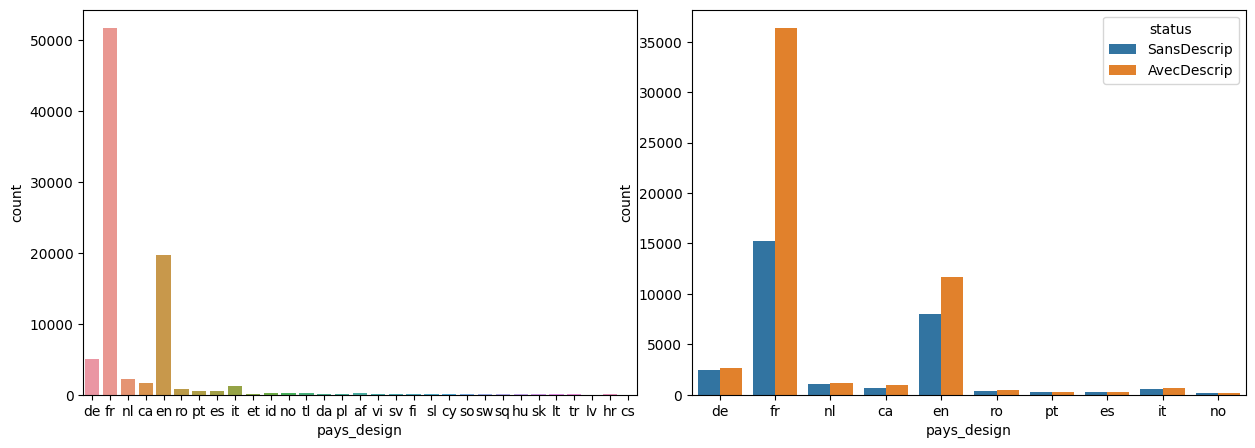

In [10]:

fig, axs = plt.subplots(1, 2, figsize=(15,5))
sns.countplot(x=df['pays_design'],ax=axs[0])
pays_principaux=df['pays_design'].value_counts()[:10]
print(pays_principaux.index)
sns.countplot(x=df[df['pays_design'].isin(pays_principaux.index)]['pays_design'],hue=df['status'],ax=axs[1])
plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()

In [12]:
print("Le francais et l'anglais sont les langues majoritaires !")
print("1/3 des produits n'ont pas de descriptions")
df['status'].value_counts()

Le francais et l'anglais sont les langues majoritaires !
1/3 des produits n'ont pas de descriptions


AvecDescrip    55049
SansDescrip    29867
Name: status, dtype: int64

#### Répartition des langues pour la colonne 'designation'  avec ratio_langue   = 0.99 (déterminée avec certitude)

Index(['fr', 'en', 'de', 'nl', 'ca', 'it', 'ro', 'pt', 'es', 'no'], dtype='object')


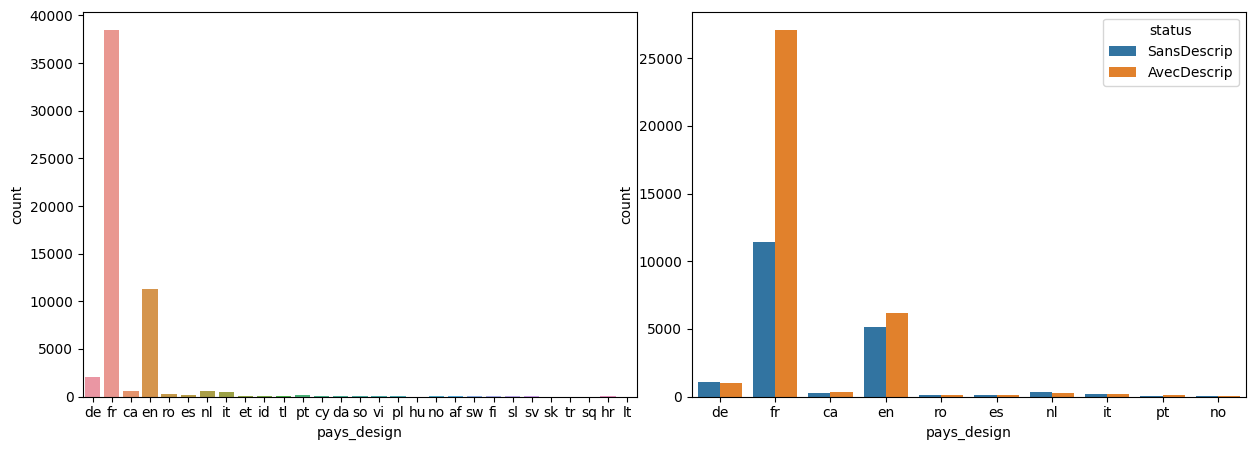

In [13]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
df_99=df[df['Ratio_design']>0.98]
#df_99.info()
sns.countplot(x=df_99['pays_design'],ax=axs[0])
pays_principaux99=df['pays_design'].value_counts()[:10]
print(pays_principaux99.index)
sns.countplot(x=df_99[df_99['pays_design'].isin(pays_principaux99.index)]['pays_design'],hue=df['status'],ax=axs[1])
plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()

#### désignations : longueurs des libellés

250


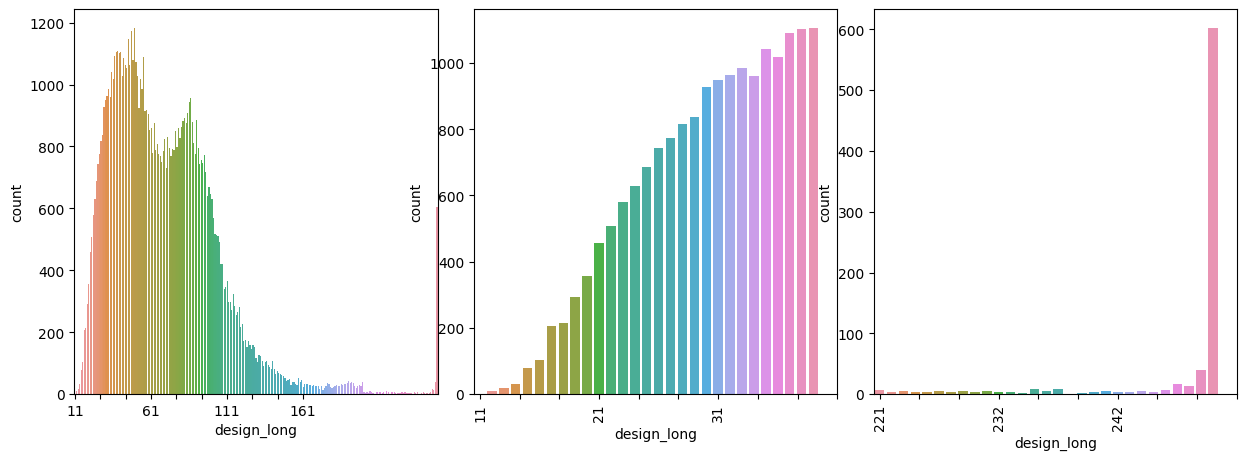

In [14]:
print(df_langue['design_long'].max())
fig, axs = plt.subplots(1, 3, figsize=(15,5))

sns.countplot(x=df_langue['design_long'],ax=axs[0])
axs[0].set_xticks(np.linspace(0,150, 10))
sns.countplot(x=df_langue[df_langue['design_long'] <40]['design_long'],ax=axs[1])
axs[1].set_xticks(np.linspace(0, 30, 10))
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
sns.countplot(x=df_langue[(df_langue['design_long'] > 220) & (df_langue['design_long'] < 300)]['design_long'],ax=axs[2])
axs[2].set_xticks(np.linspace(0, 30, 10))
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()

### DESCRIPTIONS

#### Répartition des langues pour la colonne 'description'

Index(['fr', 'en', 'de', 'ca', 'it', 'cy', 'pt', 'ro', 'es', 'vi'], dtype='object')


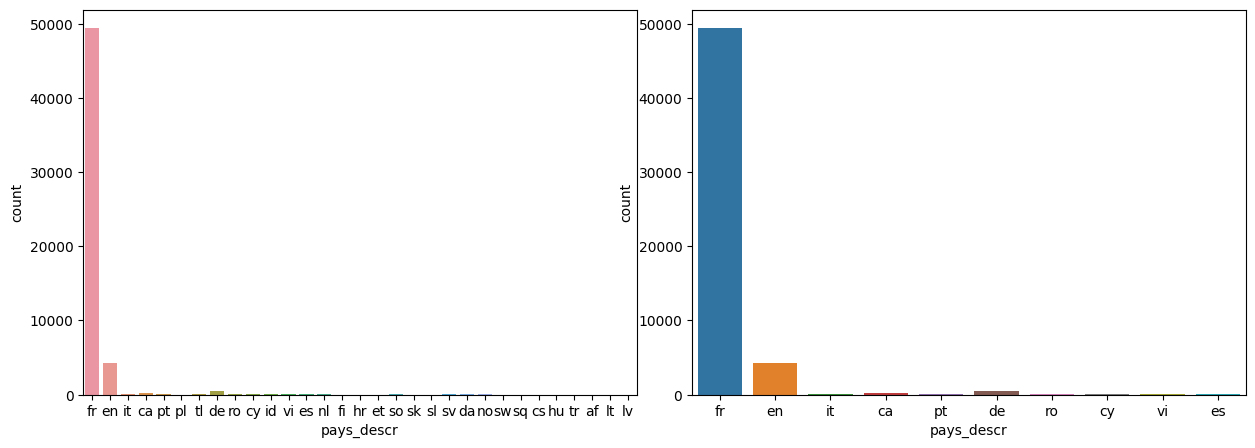

In [15]:
fig, axs = plt.subplots(1, 2, figsize=(15,5))
df_descrip=df.dropna(subset=['description'])
sns.countplot(x=df_descrip['pays_descr'],ax=axs[0])
pays_principaux=df['pays_descr'].value_counts()[:10]
print(pays_principaux.index)
plt.subplots_adjust( wspace=0.1,hspace=0.5)
sns.countplot(x=df[df['pays_descr'].isin(pays_principaux.index)]['pays_descr'],ax=axs[1])
plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()

In [16]:
print("Le francais et l'anglais sont les langues majoritaires !")


Le francais et l'anglais sont les langues majoritaires !


12451.0


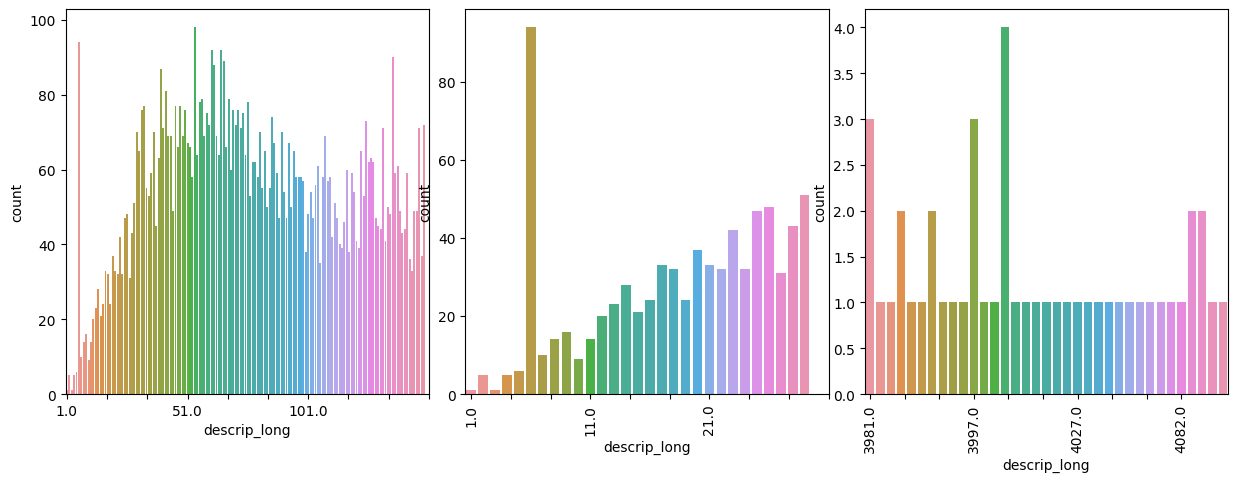

In [17]:
print(df_langue['descrip_long'].max())
fig, axs = plt.subplots(1, 3, figsize=(15,5))
sns.countplot(x=df_langue[(df_langue['descrip_long']  < 150) ]['descrip_long'],ax=axs[0])
#xmin, xmax = axs[0].get_xlim()
axs[0].set_xticks(np.linspace(0, 150, 10))
sns.countplot(x=df_langue[ (df_langue['descrip_long'] <30)]['descrip_long'],ax=axs[1])
axs[1].set_xticks(np.linspace(0, 30, 10))
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=90)
sns.countplot(x=df_langue[(df_langue['descrip_long'] > 3980) & (df_langue['descrip_long'] < 4100)]['descrip_long'],ax=axs[2])
axs[2].set_xticks(np.linspace(0, 30, 10))
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=90)
plt.subplots_adjust( wspace=0.1,hspace=0.5)
plt.show()

#### création d'un dataframe rassemblant les 8 langues les plus représentatives de chaque catégorie
#### et en rassemblant les autres sous la dénomination "XX"

In [18]:
df2=df.copy()
for prt in df2['prdtypecode'].unique():
    print("prdtypecode : " ,prt)
    filtre = df2['prdtypecode']==prt
    pays_principaux=df2[filtre]['PAYS_LANGUE'].value_counts()[:8]
    print(pays_principaux.index)
    df2.loc[(filtre) & (~df2['PAYS_LANGUE'].isin(pays_principaux.index)),'PAYS_LANGUE']="XX"

prdtypecode :  10
Index(['fr', 'en', 'de', 'nl', 'es', 'it', 'ca', 'pt'], dtype='object')
prdtypecode :  2280
Index(['fr', 'en', 'de', 'nl', 'it', 'ca', 'ro', 'es'], dtype='object')
prdtypecode :  50
Index(['fr', 'en', 'de', 'nl', 'no', 'pt', 'ca', 'it'], dtype='object')
prdtypecode :  1280
Index(['fr', 'en', 'de', 'it', 'nl', 'ca', 'ro', 'es'], dtype='object')
prdtypecode :  2705
Index(['fr', 'en', 'de', 'ca', 'nl', 'it', 'es', 'af'], dtype='object')
prdtypecode :  2522
Index(['fr', 'en', 'de', 'ca', 'nl', 'it', 'ro', 'es'], dtype='object')
prdtypecode :  2582
Index(['fr', 'en', 'de', 'ca', 'ro', 'nl', 'pt', 'it'], dtype='object')
prdtypecode :  1560
Index(['fr', 'en', 'de', 'ca', 'nl', 'it', 'pt', 'es'], dtype='object')
prdtypecode :  1281
Index(['fr', 'en', 'de', 'nl', 'es', 'ca', 'it', 'id'], dtype='object')
prdtypecode :  1920
Index(['fr', 'en', 'de', 'nl', 'ca', 'ro', 'it', 'no'], dtype='object')
prdtypecode :  2403
Index(['fr', 'en', 'nl', 'de', 'ca', 'it', 'es', 'tl'], dtype='o

## Répartition des langues par catégorie (XX = le reste du monde)

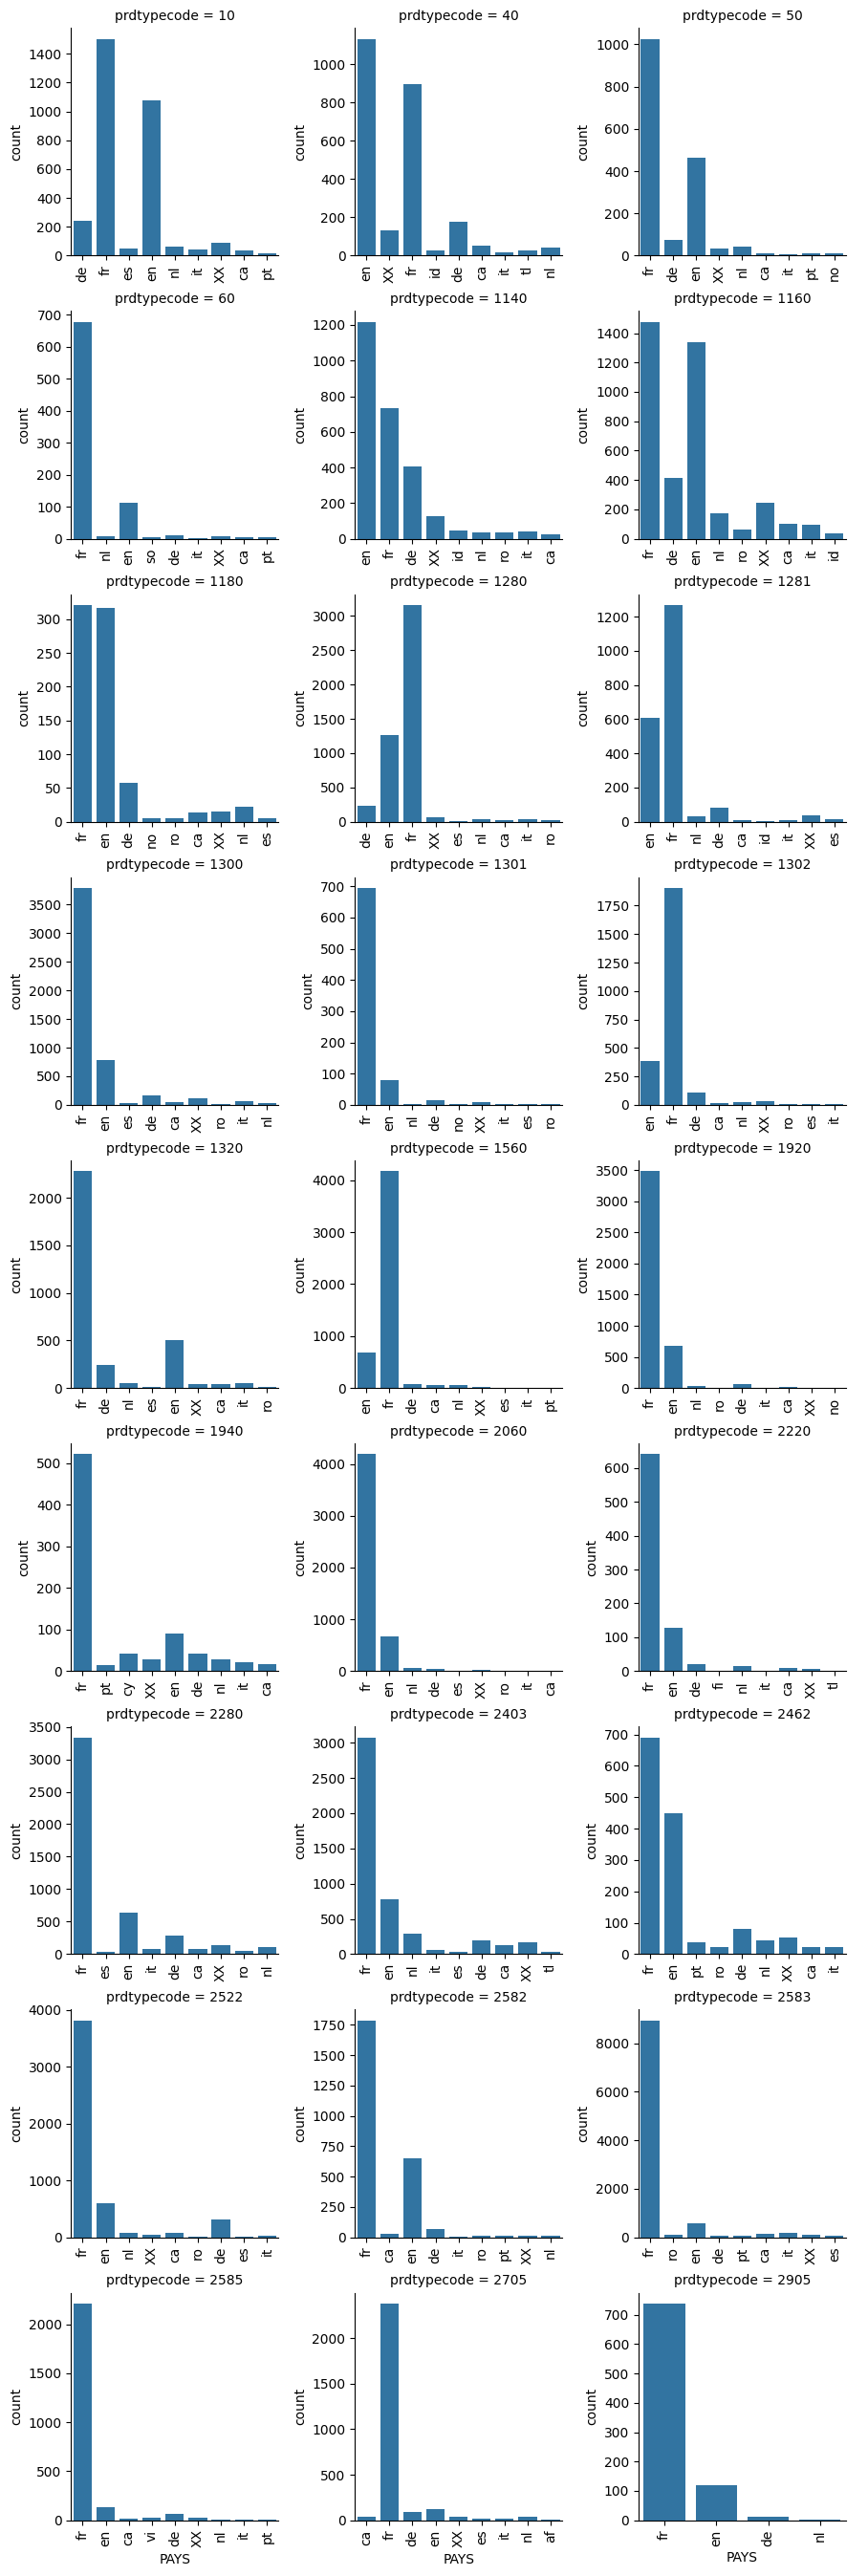

In [19]:
g = sns.FacetGrid(data=df2, col='prdtypecode', col_wrap=3,sharex=False, sharey=False)
g.map_dataframe(sns.countplot, 'PAYS_LANGUE')
g.set_xticklabels( rotation=90)
g.set_xlabels('PAYS')
g.add_legend()
plt.show()


## Niveau de certitude (de 0 à 1) sur la determination de
## la langue principale par catégorie   

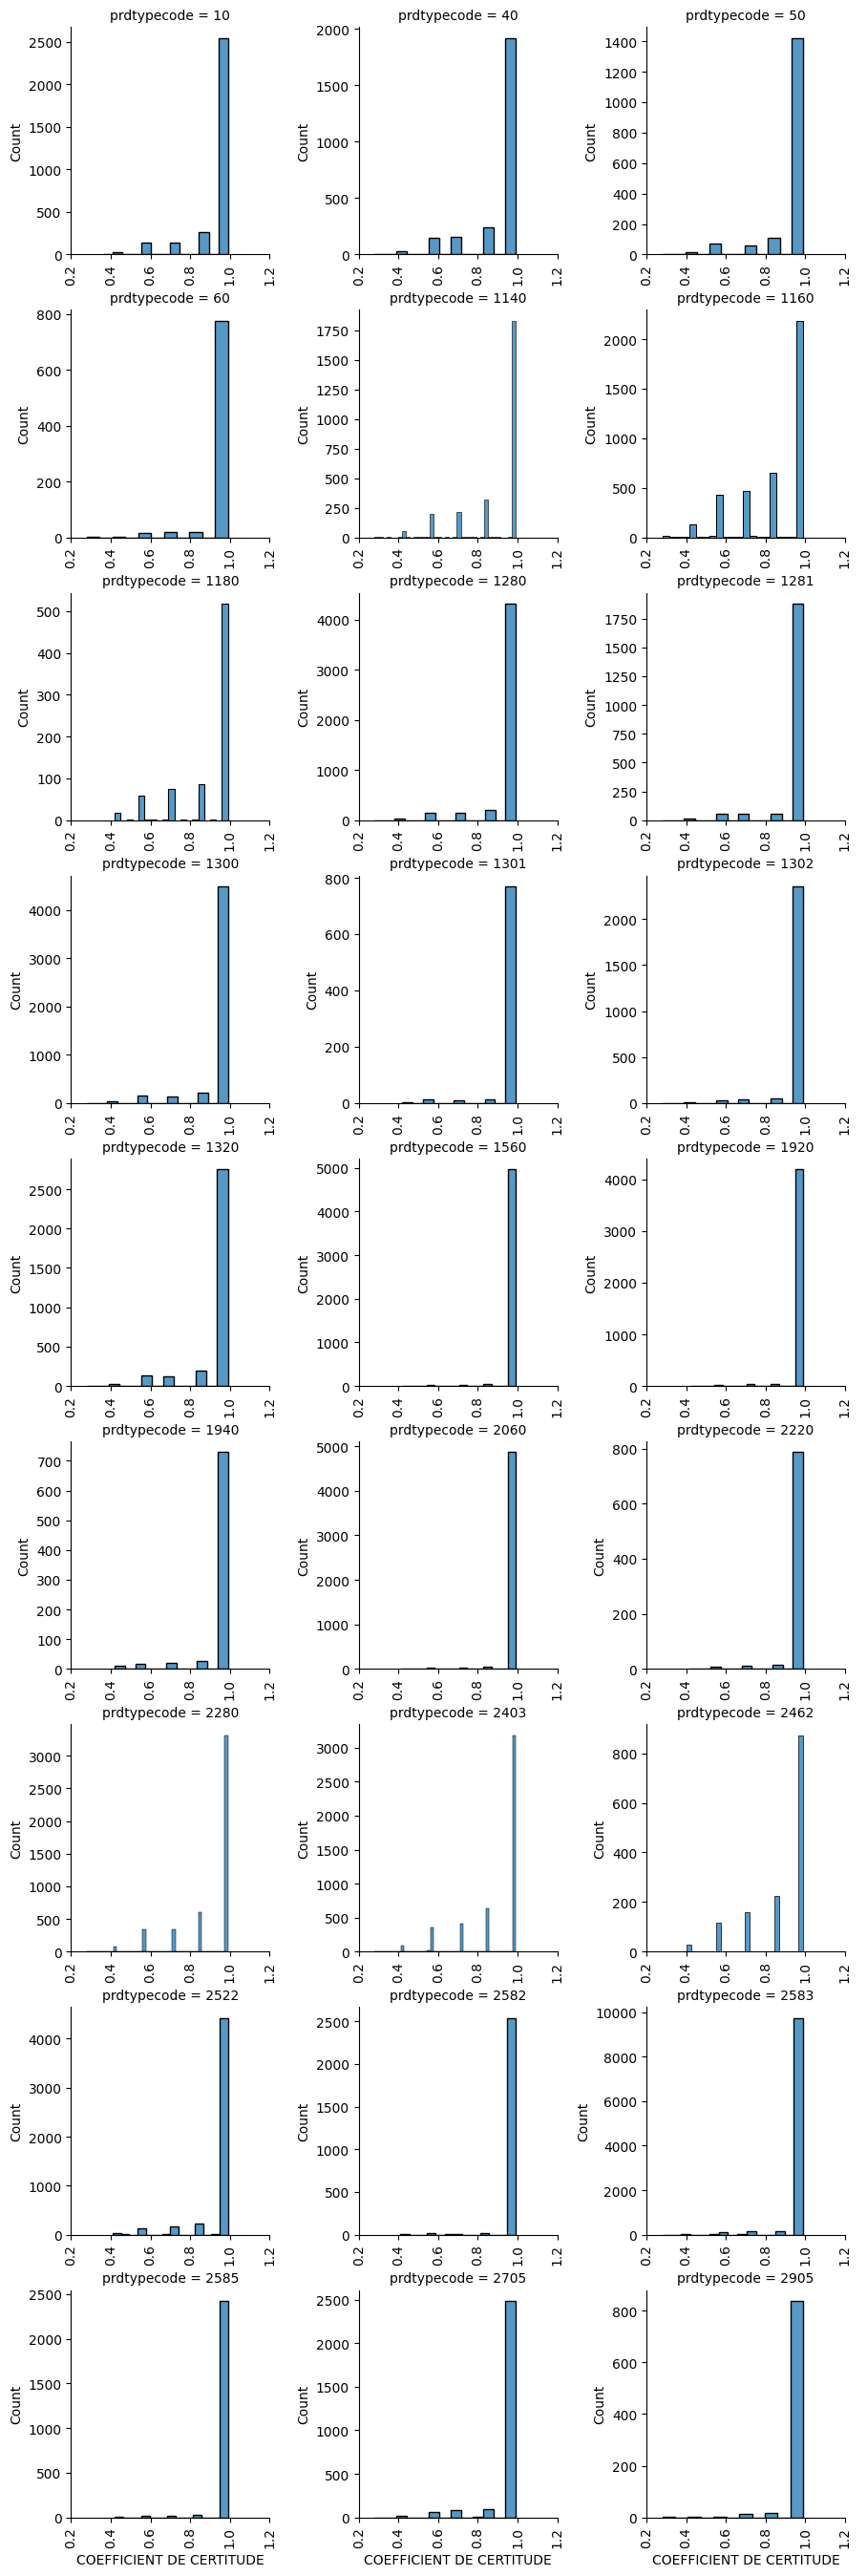

In [20]:
g = sns.FacetGrid(data=df2, col='prdtypecode', col_wrap=3,sharex=False, sharey=False)
g.map_dataframe(sns.histplot, 'RATIO_LANGUE')
g.set_xticklabels( rotation=90)
g.set_xlabels('COEFFICIENT DE CERTITUDE')
g.add_legend()
plt.show()

## critère déterminant du choix de la langue

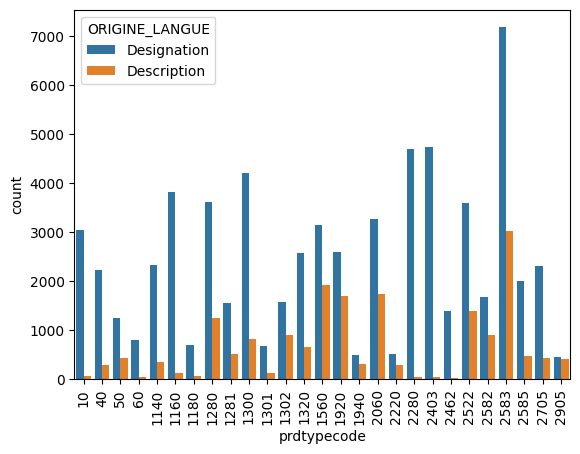

In [21]:

g=sns.countplot(x=df['prdtypecode'],hue=df['ORIGINE_LANGUE'])
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.show()